<a href="https://colab.research.google.com/github/Nhat-Thanh/CS523.L21/blob/main/String_Search/String_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Clone mã nguồn và toàn bộ kết quả từ github.**

In [ ]:
!git clone https://github.com/Nhat-Thanh/CS523.L21.git

Cloning into 'CS523.L21'...
remote: Enumerating objects: 19124, done.
remote: Counting objects: 100% (19124/19124), done.
remote: Compressing objects: 100% (8436/8436), done.
remote: Total 19124 (delta 10812), reused 18869 (delta 10673), pack-reused 0
Receiving objects: 100% (19124/19124), 47.44 MiB | 19.66 MiB/s, done.
Resolving deltas: 100% (10812/10812), done.
Checking out files: 100% (22984/22984), done.


In [ ]:
# Chuyển workspace vào thư mục chính
%cd /content/CS523.L21/String_Search

/content/CS523.L21/String_Search


#**2. Định nghĩa các hàm hỗ trợ cho việc dự đoán và chuẩn hóa dữ liệu**

##**2.1. Import các thư viện cần thiết.**

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy.special import factorial
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

##**2.2. Hàm xây dựng dữ liệu cho X và y.**

- Xây dựng một mảng 2 chiều.
  - Hàng 1 là các kích thước của m.
  - Hàng 2 là các kích thước của n.
  - Hàng 3 là các kích thước của k.


- Xây dựng một mảng 1 chiều y:
  - y là thời gian thực thi ứng với m, n, k tương ứng


In [ ]:
def make_data(csv_path, TH, param):
  # đọc file csv
  csv = pd.read_csv(csv_path).values 
  # X chứa 3 tham số m, n, k
  X = [[], [], []]
  # y chứa kết quả tương ứng với m, n, k
  y = []
  m = csv[:, 0].reshape(-1, 1)
  n = np.empty(50)
  k = np.empty(50)

  if (TH == 'TH1' and param == 'n'):
    k.fill(2000)
    # print(k.shape)
    # print(n.shape)
    # print(m.shape)
    for col in range(50):
      n.fill(505000 + 5000 * col)
      time = csv[:, col + 1].reshape(-1, 1)
      for i in range(50):
        X[0].append(int(m[i]))
        X[1].append(int(n[i]))
        X[2].append(int(k[i]))
        y.append(float(time[i]))

  elif (TH == 'TH2' and param == 'n'):
    k.fill(5)
    for col in range(50):
      n.fill(10000000 * (col + 1))
      time = csv[:, col + 1].reshape(-1, 1)
      for i in range(50):
        X[0].append(int(m[i]))
        X[1].append(int(n[i]))
        X[2].append(int(k[i]))
        y.append(float(time[i]))

  elif (TH == "TH1" and param == 'k'):
    n.fill(400000)
    for col in range(50):
      n.fill(100 * (col + 1))
      time = csv[:, col + 1].reshape(-1, 1)
      for i in range(50):
        X[0].append(int(m[i]))
        X[1].append(int(n[i]))
        X[2].append(int(k[i]))
        y.append(float(time[i]))
  X = np.array(X)
  X = X.T

  y = np.array(y)
  y = y.T
  return X, y

##**2.3. Hàm ước tính thời gian chạy đối với m, n, k tương ứng.**

- Hàm ước tính thời gian chạy đối với m, n, k tương ứng với các độ phực tạp thời gian của các thuật toán (bao gồm cả tiền xử lý).

In [ ]:
def estimate(m, n, k):
  result = [
            [], # 'n * k * m'
            [], # 'm + (k * n + m)'
            [], # 'm + (k * n - m) * m'
            [], # '(m + 62) + n * k / m'
            [], # '(m + 62) + n * k * m'
            [], # 'm + n * k'
            []  # 'm + m * k * n'
            ]

  np.set_printoptions(precision=6)

  for i in range(n.shape[0]):
    result[0].append(int(n[i] * k[i] * m[i]) / 1000000)
    result[1].append(int(m[i] + (k[i] * n[i] + m[i])) / 1000000)
    result[2].append(int(m[i] + (k[i] * n[i] - m[i]) * m[i]) / 1000000)
    result[3].append(int((m[i] + 62) + n[i] * k[i] / m[i]) / 1000000)
    result[4].append(int((m[i] + 62) + n[i] * k[i] * m[i]) / 1000000)
    result[5].append(int(m[i] + n[i] * k[i]) / 1000000)
    result[6].append(int(m[i] + m[i] * k[i] * n[i]) / 1000000)
  result = np.array(result)
  return result.T

##**2.4.Hàm in độ sai sô thời gian chạy đối với m, n, k tương ứng.**

- Hàm in đô sai số thời gian chạy thực tế với thời gian chạy với các tham số m, n, k tương ứng với các độ phực tạp thời gian của các thuật toán (bao gồm cả tiền xử lý).

In [ ]:
def print_complexity(y, Y_est):
  print(f"\nn * k * m: = {mean_squared_error(y, Y_est[:, 0])}")
  print(f"m + (k * n + m): = {mean_squared_error(y, Y_est[:, 1])}")
  print(f"m + (k * n - m) * m: = {mean_squared_error(y, Y_est[:, 2])}")
  print(f"(m + 62) + n * k / m: = {mean_squared_error(y, Y_est[:, 3])}")
  print(f"(m + 62) + n * k * m: = {mean_squared_error(y, Y_est[:, 4])}")
  print(f"m + n * k: = {mean_squared_error(y, Y_est[:, 5])}")
  print(f"m + m * k * n: = {mean_squared_error(y, Y_est[:, 6])}\n")

#**3. Ước tính độ phức tạp của các trường hợp.**

In [ ]:
def auto_run(param, TH, KB_to_MB=False):
  csv_time = f"sheet/m_{param}_{TH}_time.csv"
  csv_RSS = f"sheet/m_{param}_{TH}_RSS.csv"
  csv_SIZE = f"sheet/m_{param}_{TH}_SIZE.csv"
  csv_VSIZE = f"sheet/m_{param}_{TH}_VSIZE.csv"

  X_time, y_time = make_data(csv_time, TH, param)
  X_rss, y_rss = make_data(csv_RSS, TH, param)
  X_size, y_size = make_data(csv_SIZE, TH, param)
  X_vsize, y_vsize = make_data(csv_VSIZE, TH, param)

  Y_time_est = np.array(estimate(X_time[:, 0], X_time[:, 1], X_time[:, 2]))
  
  # print(f"X shape: {X.shape}")
  # print(f"y shape: {y.shape}")
  # print(f"y_est shape: {Y_est.shape}")

  # print(X)
  # print(Y_est)
  # print(y)
  model = LinearRegression()
  model.fit(X_time, y_time)
  y_time_pred = model.predict(X_time)
  unit = 'MB' if KB_to_MB == True else 'KB'


  i = 0
  while i < len(y_size) and KB_to_MB:
    y_size[i] /= 1024 
    y_rss[i] /= 1024 
    y_vsize[i] /= 1024
    i += 1

  # Kích thước font
  fsize = 13

  print_complexity(y_time, Y_time_est)  

  # Vẽ 4 biểu đồ con, mỗi biểu đồ có kích thước 12x12
  fig, axs = plt.subplots(2, 2, figsize = (12, 12))

  axs[0, 0].plot(X_time[0:50, 0], y_time_pred[0:50], color='red')
  axs[0, 0].plot(X_time[450:500, 0], y_time_pred[450:500],color='orange')
  axs[0, 0].plot(X_time[950:1000, 0], y_time_pred[950:1000], color='brown')
  axs[0, 0].plot(X_time[1450:1500, 0], y_time_pred[1450:1500], color='green')
  axs[0, 0].plot(X_time[1950:2000, 0], y_time_pred[1950:2000], color='black')
  axs[0, 0].plot(X_time[2450:2500, 0], y_time_pred[2450:2500], color='purple')
  axs[0, 0].set_xlabel('\nđộ dài chuỗi cần tìm', fontsize = fsize)
  axs[0, 0].set_ylabel('time (s)', fontsize = fsize)

  axs[0, 1].plot(X_size[0:50, 0], y_size[0:50], color='red')
  axs[0, 1].plot(X_size[450:500, 0], y_size[450:500],color='orange')
  axs[0, 1].plot(X_size[950:1000, 0], y_size[950:1000], color='brown')
  axs[0, 1].plot(X_size[1450:1500, 0], y_size[1450:1500], color='green')
  axs[0, 1].plot(X_size[1950:2000, 0], y_size[1950:2000], color='black')
  axs[0, 1].plot(X_size[2450:2500, 0], y_size[2450:2500], color='purple')
  axs[0, 1].set_xlabel('\nđộ dài chuỗi cần tìm', fontsize = fsize)
  axs[0, 1].set_ylabel(f'size ({unit})', fontsize = fsize)

  axs[1, 0].plot(X_rss[0:50, 0], y_rss[0:50], color='red')
  axs[1, 0].plot(X_rss[450:500, 0], y_rss[450:500],color='orange')
  axs[1, 0].plot(X_rss[950:1000, 0], y_rss[950:1000], color='brown')
  axs[1, 0].plot(X_rss[1450:1500, 0], y_rss[1450:1500], color='green')
  axs[1, 0].plot(X_rss[1950:2000, 0], y_rss[1950:2000], color='black')
  axs[1, 0].plot(X_rss[2450:2500, 0], y_rss[2450:2500], color='purple')
  axs[1, 0].set_xlabel('\nđộ dài chuỗi cần tìm', fontsize = fsize)
  axs[1, 0].set_ylabel(f'rss ({unit})', fontsize = fsize)

  axs[1, 1].plot(X_vsize[0:50, 0], y_vsize[0:50], color='red')
  axs[1, 1].plot(X_vsize[450:500, 0], y_vsize[450:500],color='orange')
  axs[1, 1].plot(X_vsize[950:1000, 0], y_vsize[950:1000], color='brown')
  axs[1, 1].plot(X_vsize[1450:1500, 0], y_vsize[1450:1500], color='green')
  axs[1, 1].plot(X_vsize[1950:2000, 0], y_vsize[1950:2000], color='black')
  axs[1, 1].plot(X_vsize[2450:2500, 0], y_vsize[2450:2500], color='purple')
  axs[1, 1].set_xlabel('\nđộ dài chuỗi cần tìm', fontsize = fsize)
  axs[1, 1].set_ylabel(f'vsize ({unit})', fontsize = fsize)
  plt.show

##**3.1 Cố định n và k và m tăng dần, k rất nhiều.**


n * k * m: = 159663.04064680001
m + (k * n + m): = 259.64632472449995
m + (k * n - m) * m: = 18066637.29221933
(m + 62) + n * k / m: = 261.2772935819796
(m + 62) + n * k * m: = 159702.90185646195
m + n * k: = 261.0691879845
m + m * k * n: = 159702.86687532798



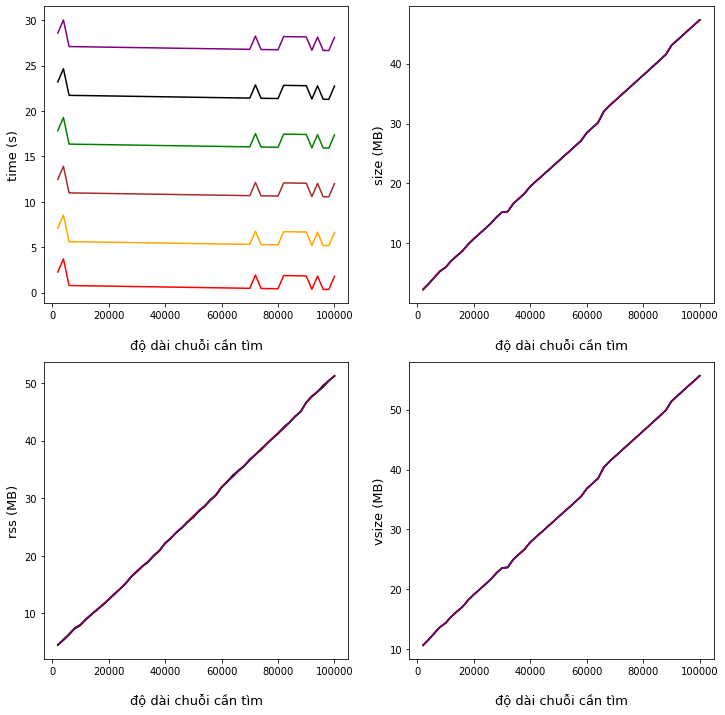

In [ ]:
auto_run('k', 'TH1', KB_to_MB=True)

##**3.2. Cố định k, n và m tăng dần, k rất nhiều.**


n * k * m: = 5480147379934369.0
m + (k * n + m): = 1566555.516986664
m + (k * n - m) * m: = 5479494558647209.0
(m + 62) + n * k / m: = 137.76829901583505
(m + 62) + n * k * m: = 5480147388561644.0
m + n * k: = 1566428.6923116718
m + m * k * n: = 5480147388553708.0



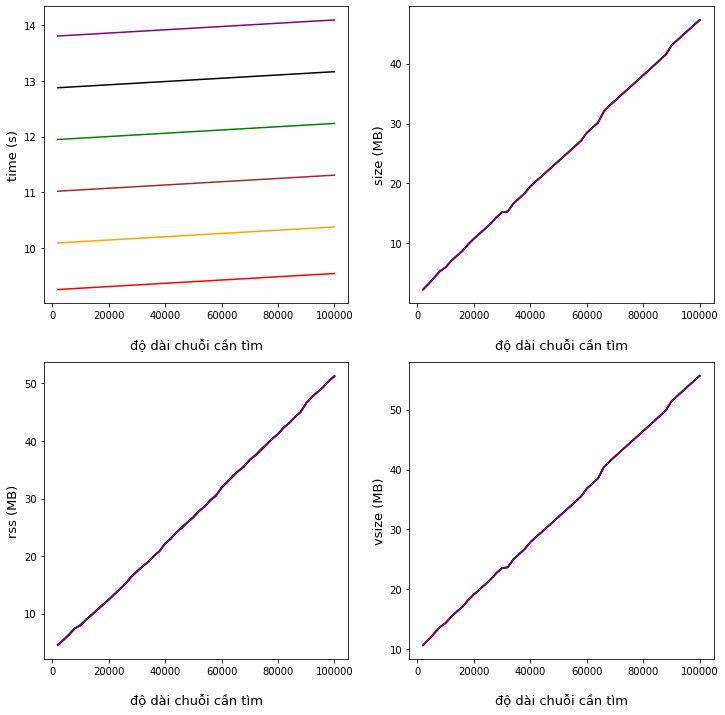

In [ ]:
auto_run('n', 'TH1', KB_to_MB=True)

##**3.3. Cố định k, n và m tăng dần, n rất dài, và k rất ít.**


n * k * m: = 7370219332039167.0
m + (k * n + m): = 2086809.063143248
m + (k * n - m) * m: = 7369556106935524.0
(m + 62) + n * k / m: = 420.9442085764935
(m + 62) + n * k * m: = 7370219340803929.0
m + n * k: = 2086680.8704883042
m + m * k * n: = 7370219340795865.0



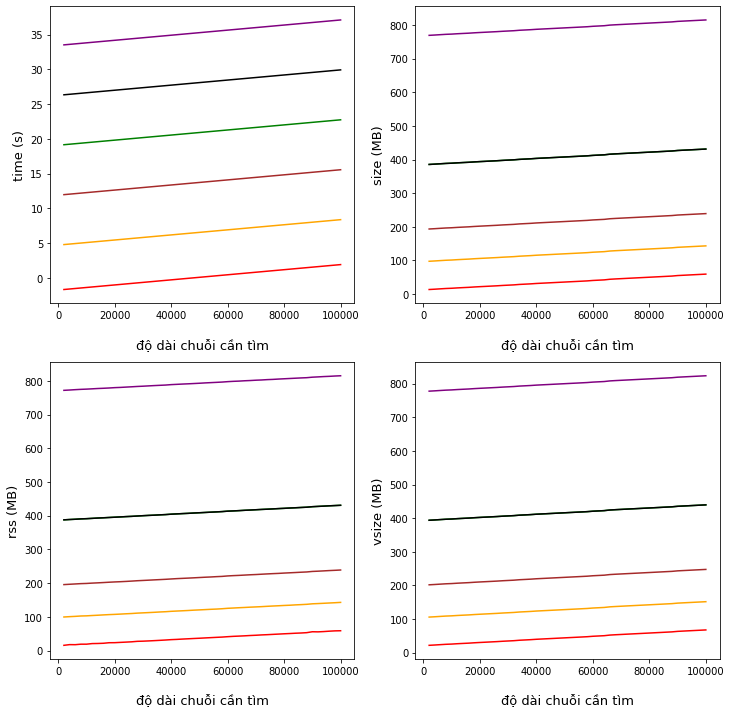

In [ ]:
auto_run('n', 'TH2', KB_to_MB=True)